# Del Dato al Diagnóstico: Desarrollando Herramientas Predictivas para el Cáncer de Pulmón usando Machine Learning

<img src="descarga.jpeg" width="900"/>




#### En este proyecto, y a través de la limpieza, transformación, filtración y técnicas de visualización de datos, así como la implementación de algoritmos de aprendizaje automático (machine learning), se pretende analizar un conjunto de datos acerca de usuarios que sufren de cáncer de pulmón, y otros que no.
#### El objetivo final de este desarrollo, es implementar la herramienta predictiva en una aplicación la cual pueda ser intuitiva para cualquier tipo de usuario, desde curiosos hasta médicos profesionales, esto para proporcionarle información acerca de qué tan probable es que el nuevo paciente haya contraído cáncer de pulmón, y de esta manera llevar a cabo acciones que puedan reducir el riesgo de mortalidad del sujeto.

# 1. Análisis exploratorio de datos:
#### En esta primera sección, vamos a comenzar a explorar el dataset "survey_lung_cancer.csv" y llevaremos a cabo un EDA (Análisis Exploratorio de Datos)

In [131]:
# Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [132]:
dataframe = pd.read_csv("survey_lung_cancer.csv")
dataframe.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [133]:
# Identificamos el total de datos no nulos, y el tipo de dato de cada columna
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

#### Antes de continuar, se realizará el cambio de nombres de las columnas a su tradución al español

In [134]:
nombres = ['Genero', 'Edad', 'Fuma','Dedos amarillos','Ansiedad','Presion de grupo','Enfermedad cronica','Fatiga','Alergia','Jadeos','Consumo de alcohol','Tos','Falta de aire','Dificultad para tragar','Dolor de pecho','Cancer de pulmon']
dataframe.columns = nombres

In [135]:
dataframe.head()

,Genero,Edad,Fuma,Dedos amarillos,Ansiedad,Presion de grupo,Enfermedad cronica,Fatiga,Alergia,Jadeos,Consumo de alcohol,Tos,Falta de aire,Dificultad para tragar,Dolor de pecho,Cancer de pulmon
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


#### Ahora, se hará el cambio de valores a 0 en los valores que contengan 1, y 1 en los valores que contengan 2

In [136]:
# Definimos las columnas que no queremos modificar
columnas_excluidas = ['GENERO', 'EDAD', 'CANCER DE PULMON']

# Realizamos la sustitución para todas las columnas excepto las excluidas
for columna in dataframe:
    if columna not in columnas_excluidas:
        dataframe[columna] = dataframe[columna].replace({1: 0, 2: 1})
    
dataframe['Cancer de pulmon'] = dataframe['Cancer de pulmon'].replace({'YES':'SI'})

        
dataframe.head()

,Genero,Edad,Fuma,Dedos amarillos,Ansiedad,Presion de grupo,Enfermedad cronica,Fatiga,Alergia,Jadeos,Consumo de alcohol,Tos,Falta de aire,Dificultad para tragar,Dolor de pecho,Cancer de pulmon
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,SI
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,SI
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [137]:
# Analizamos la cantidad de datos de cada columna,
# así como la media, desviación estándar, valores mínimo y máximo, etc.

dataframe.describe(include="all")

,Genero,Edad,Fuma,Dedos amarillos,Ansiedad,Presion de grupo,Enfermedad cronica,Fatiga,Alergia,Jadeos,Consumo de alcohol,Tos,Falta de aire,Dificultad para tragar,Dolor de pecho,Cancer de pulmon
count,309,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SI
freq,162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270
mean,NaN,62.673139,0.563107,0.569579,0.498382,0.501618,0.504854,0.673139,0.556634,0.556634,0.556634,0.579288,0.640777,0.469256,0.556634,NaN
std,NaN,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,NaN
min,NaN,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,62.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,NaN
75%,NaN,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


Se identifica un total de 270 registros que sí tienen cáncer de pulmón, lo que nos deja una cantidad de 39 pacientes que no tenían cáncer de pulmón.

## Análisis gráfico
A través del método "hist" del objeto "dataframe", obtenemos la distribución de todas las variables del conjunto de datos:

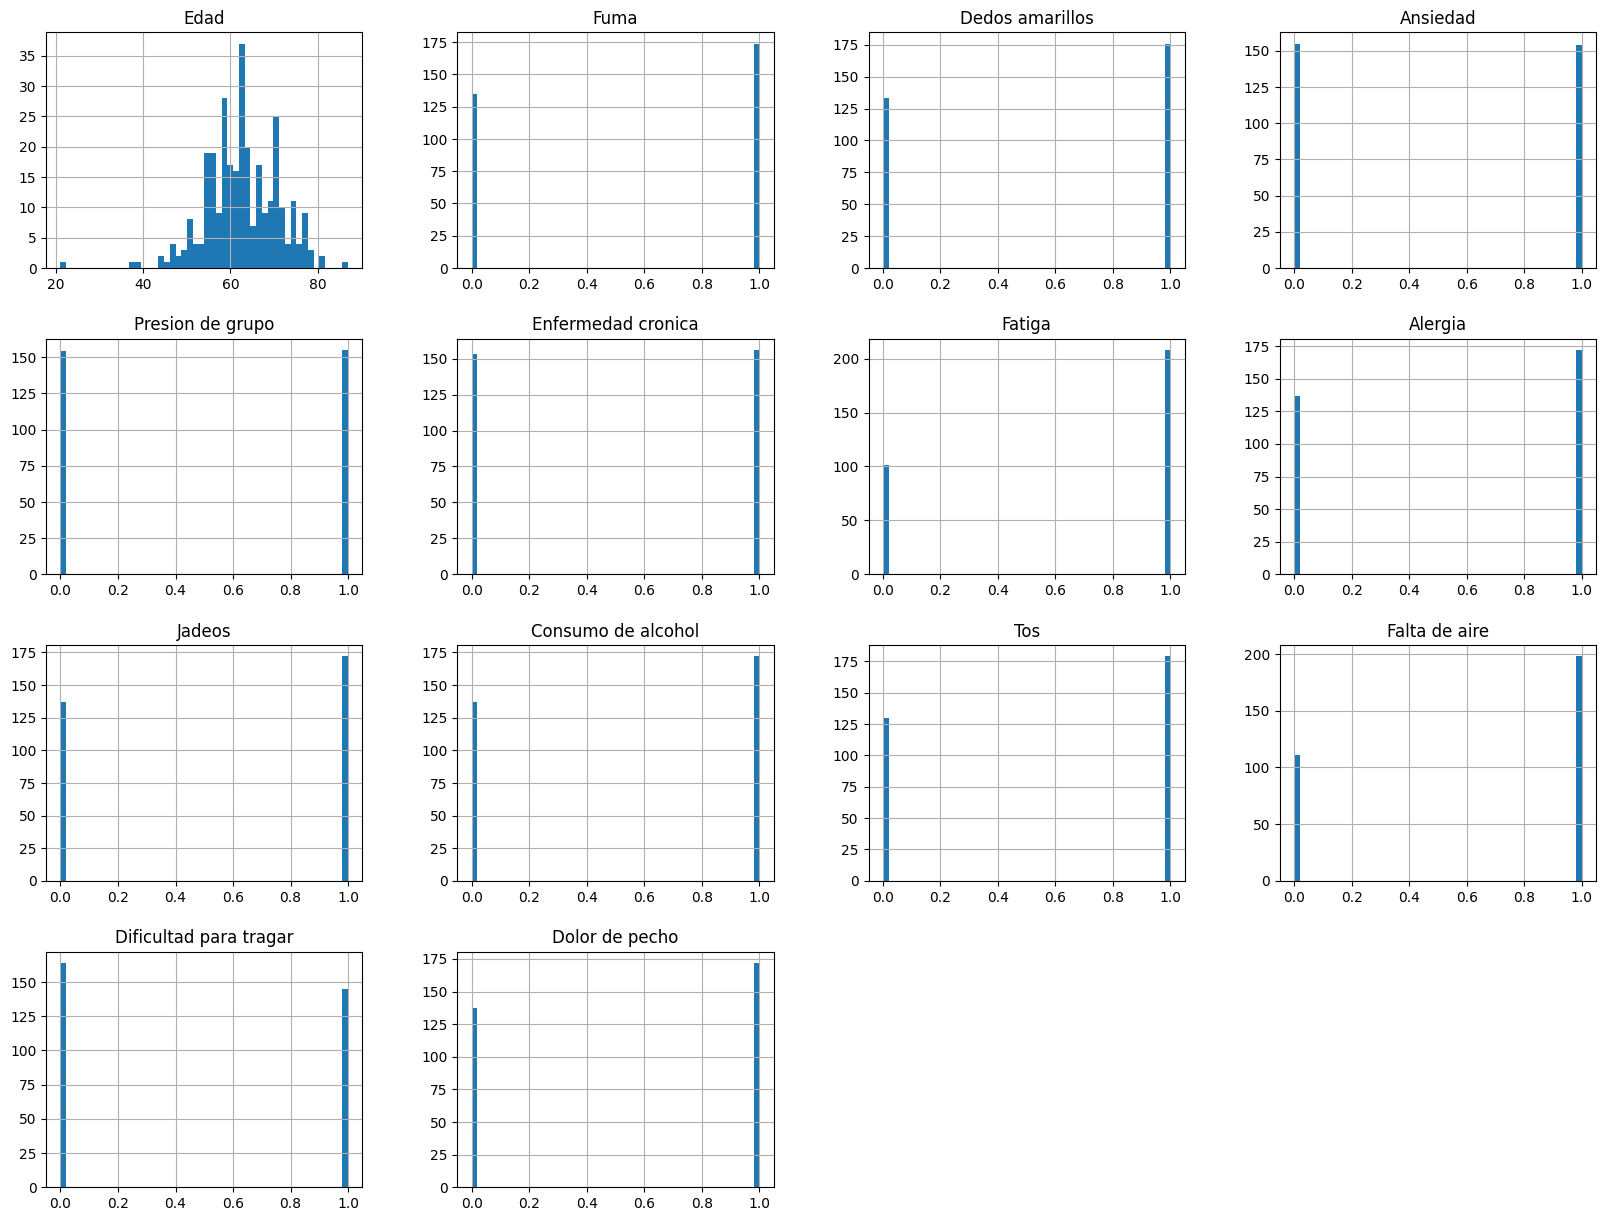

In [138]:
# Visualización de distribuciones
dataframe.hist(bins=50, figsize=(20,15))
plt.show()

Ahora, vamos a analizar las correlaciones entre las variables:

In [139]:
dimensiones_numericas = dataframe.select_dtypes(include=['int64','float64'])

matriz_correlacion = dimensiones_numericas.corr()
matriz_correlacion

,Edad,Fuma,Dedos amarillos,Ansiedad,Presion de grupo,Enfermedad cronica,Fatiga,Alergia,Jadeos,Consumo de alcohol,Tos,Falta de aire,Dificultad para tragar,Dolor de pecho
Edad,1.000000,-0.084475,0.005205,0.053170,0.018685,-0.012642,0.012614,0.027990,0.055011,0.058985,0.169950,-0.017513,-0.001270,-0.018104
Fuma,-0.084475,1.000000,-0.014585,0.160267,-0.042822,-0.141522,-0.029575,0.001913,-0.129426,-0.050623,-0.129471,0.061264,0.030718,0.120117
Dedos amarillos,0.005205,-0.014585,1.000000,0.565829,0.323083,0.041122,-0.118058,-0.144300,-0.078515,-0.289025,-0.012640,-0.105944,0.345904,-0.104829
Ansiedad,0.053170,0.160267,0.565829,1.000000,0.216841,-0.009678,-0.188538,-0.165750,-0.191807,-0.165750,-0.225644,-0.144077,0.489403,-0.113634
Presion de grupo,0.018685,-0.042822,0.323083,0.216841,1.000000,0.048515,0.078148,-0.081800,-0.068771,-0.159973,-0.089019,-0.220175,0.366590,-0.094828
Enfermedad cronica,-0.012642,-0.141522,0.041122,-0.009678,0.048515,1.000000,-0.110529,0.106386,-0.049967,0.002150,-0.175287,-0.026459,0.075176,-0.036938
Fatiga,0.012614,-0.029575,-0.118058,-0.188538,0.078148,-0.110529,1.000000,0.003056,0.141937,-0.191377,0.146856,0.441745,-0.132790,-0.010832
Alergia,0.027990,0.001913,-0.144300,-0.165750,-0.081800,0.106386,0.003056,1.000000,0.173867,0.344339,0.189524,-0.030056,-0.061508,0.239433
Jadeos,0.055011,-0.129426,-0.078515,-0.191807,-0.068771,-0.049967,0.141937,0.173867,1.000000,0.265659,0.374265,0.037834,0.069027,0.147640
Consumo de alcohol,0.058985,-0.050623,-0.289025,-0.165750,-0.159973,0.002150,-0.191377,0.344339,0.265659,1.000000,0.202720,-0.179416,-0.009294,0.331226


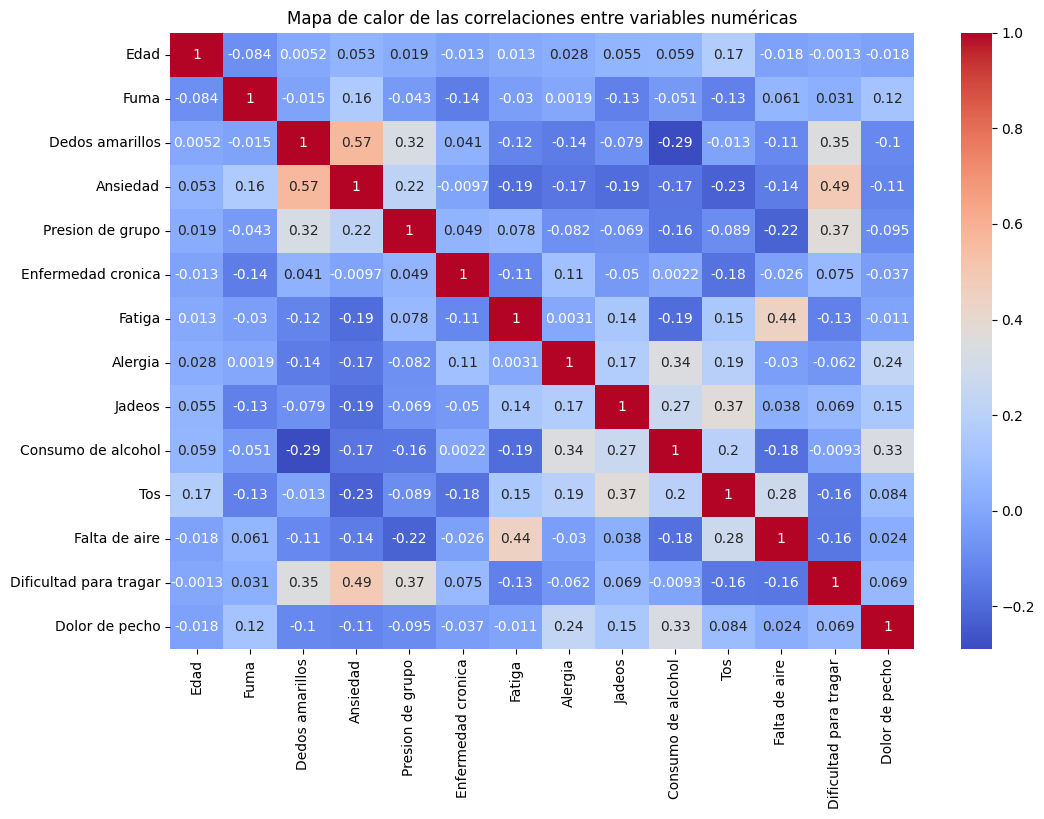

In [140]:
import seaborn as sbn

# Correlación
plt.figure(figsize=(12, 8))
sbn.heatmap(matriz_correlacion, annot=True, cmap='coolwarm')
plt.title('Mapa de calor de las correlaciones entre variables numéricas')
plt.show()

In [141]:
# Realizamos otro mapa de calor, pero ahora con las columnas 'Género' y 'Cáncer de pulmón' convertidas a numéricas

dataframe['Genero'] = dataframe['Genero'].map({'M':0, 'F':1})
dataframe['Cancer de pulmon'] = dataframe['Cancer de pulmon'].map({'NO':0, 'SI':1})

dataframe.head()

,Genero,Edad,Fuma,Dedos amarillos,Ansiedad,Presion de grupo,Enfermedad cronica,Fatiga,Alergia,Jadeos,Consumo de alcohol,Tos,Falta de aire,Dificultad para tragar,Dolor de pecho,Cancer de pulmon
0,0,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,0,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,1,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,0,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,1,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


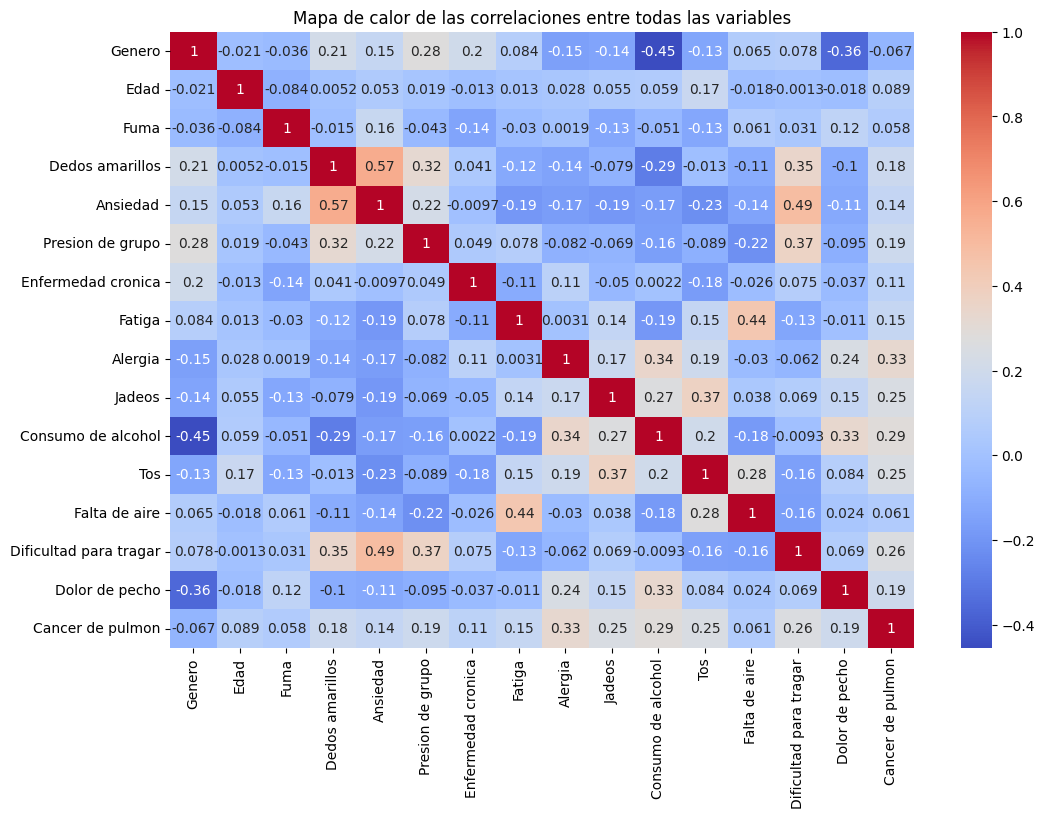

In [142]:
plt.figure(figsize=(12, 8))
sbn.heatmap(dataframe.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de las correlaciones entre todas las variables')
plt.show()

In [143]:
from sklearn.preprocessing import StandardScaler

# Instanciar el escalador
escalador = StandardScaler()

# Ajustar y transformar los datos
dataframe['Edad'] = escalador.fit_transform(dataframe['Edad'].values.reshape(-1, 1))

# 2. Machine learning 
#### En esta segunda sección, nos encargaremos de implementar múltiples algoritmos de machine learning para clasificación, como lo son:
1. K Nearest Neighbors (KNN)
2. Regresión logística con gradiente descendiente
3. Árbol de decisiones
4. Máquinas de soporte vectorial (SVM)

#### Se pretende realizar la implementación y análisis de los modelos, calcular la precisión de cada uno de ellos (comparar las etiquetas predichas contra las etiquetas reales del conjunto de datos), y decidir cuál será la mejor opción para continuar desarrollando la herramienta.

In [144]:
# Importamos el algoritmo de clasificación de regresión logística
from sklearn.linear_model import LogisticRegression
# Importamos el algoritmo de clasificación de árbol de decisiones
from sklearn.tree import DecisionTreeClassifier
# Importamos el algoritmo de clasificación de support vector machines
from sklearn.svm import SVC
# Importamos el algoritmo de clasificación de k nearest neighbors
from sklearn.neighbors import KNeighborsClassifier


#### Así mismo, utilizaremos la validación cruzada para hallar los mejores hiperparámetros para los modelos de aprendizaje automático. Nos ayudaremos de la herramienta Grid Search CV, la cual es útil para buscar la mejor combinación de hiperparámetros.

In [145]:
from sklearn.model_selection import GridSearchCV

In [146]:
# Comenzamos dividiendo el conjunto de datos en variables independientes y la dependiente
X = dataframe[['Genero', 'Edad', 'Fuma','Dedos amarillos','Ansiedad','Presion de grupo','Enfermedad cronica','Fatiga','Alergia','Jadeos','Consumo de alcohol','Tos','Falta de aire','Dificultad para tragar','Dolor de pecho']]
Y = dataframe['Cancer de pulmon']

In [147]:
X.head()

,Genero,Edad,Fuma,Dedos amarillos,Ansiedad,Presion de grupo,Enfermedad cronica,Fatiga,Alergia,Jadeos,Consumo de alcohol,Tos,Falta de aire,Dificultad para tragar,Dolor de pecho
0,0,0.771850,0,1,1,0,0,1,0,1,1,1,1,1,1
1,0,1.381829,1,0,0,0,1,1,1,0,0,0,1,1,1
2,1,-0.448107,0,0,0,1,0,1,0,1,0,1,1,0,1
3,0,0.039876,1,1,1,0,0,0,0,0,1,0,0,1,1
4,1,0.039876,0,1,0,0,0,0,0,1,0,1,1,0,0


In [148]:
Y.head()

0    1
1    1
2    0
3    0
4    0
Name: Cancer de pulmon, dtype: int64

In [149]:
# Ahora, dividimos cada dataset en conjuntos de entrenamiento y de prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

In [150]:
scores = []
parametros ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge

## Regresión Logística

In [151]:
reg_log = LogisticRegression()

reg_log_cv = GridSearchCV(reg_log, parametros, cv = 10)

reg_log_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [152]:
print("Mejores parámetros:",reg_log_cv.best_params_)
print("Precision:",reg_log_cv.best_score_)
scores.append(reg_log_cv.best_score_)

Mejores parámetros: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}
Precision: 0.9269999999999999


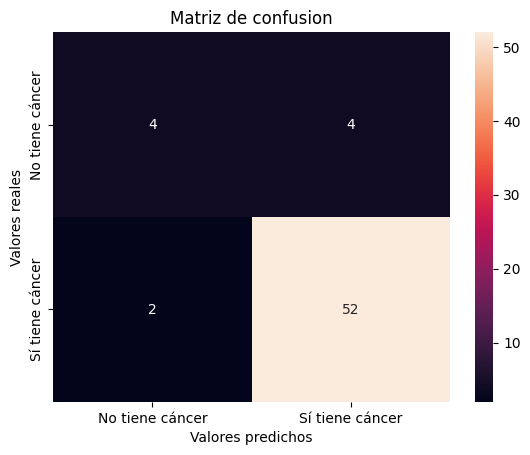

In [153]:
y_prediccion = reg_log_cv.predict(x_test)
def matriz_confusion(y_test,y_prediccion):
    
    from sklearn.metrics import confusion_matrix

    matriz_confusion = confusion_matrix(y_test,y_prediccion)
    ax= plt.subplot()
    sbn.heatmap(matriz_confusion, annot=True, ax = ax)
    ax.set_xlabel('Valores predichos')
    ax.set_ylabel('Valores reales')
    ax.set_title('Matriz de confusion'); 
    ax.xaxis.set_ticklabels(['No tiene cáncer', 'Sí tiene cáncer']); ax.yaxis.set_ticklabels(['No tiene cáncer', 'Sí tiene cáncer']) 
    plt.show() 
    
matriz_confusion(y_test, y_prediccion)

## Máquinas de Soporte Vectorial (SVM)

In [154]:
parametros = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [155]:
svm_cv = GridSearchCV(svm, parametros, cv=10)
svm_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [156]:
print("Mejores parámetros:",svm_cv.best_params_)
print("Precisión:",svm_cv.best_score_)
scores.append(svm_cv.best_score_)

Mejores parámetros: {'C': 1.0, 'gamma': 0.001, 'kernel': 'linear'}
Precisión: 0.9391666666666666


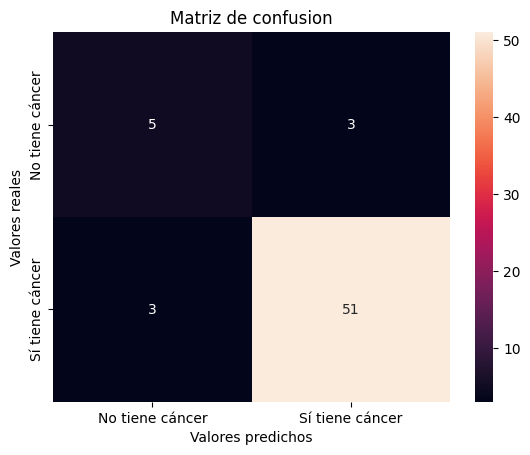

In [157]:
y_prediccion = svm_cv.predict(x_test)
matriz_confusion(y_test, y_prediccion)

## Árbol de Decisiones

In [158]:
parametros = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

arbol = DecisionTreeClassifier()

In [159]:
arbol_cv = GridSearchCV(arbol, parametros, cv=10)

arbol_cv.fit(x_train, y_train)

c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in valid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [160]:
print("Mejores parámetros",arbol_cv.best_params_)
print("Precisión",arbol_cv.best_score_)
scores.append(arbol_cv.best_score_)

Mejores parámetros {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Precisión 0.9191666666666668


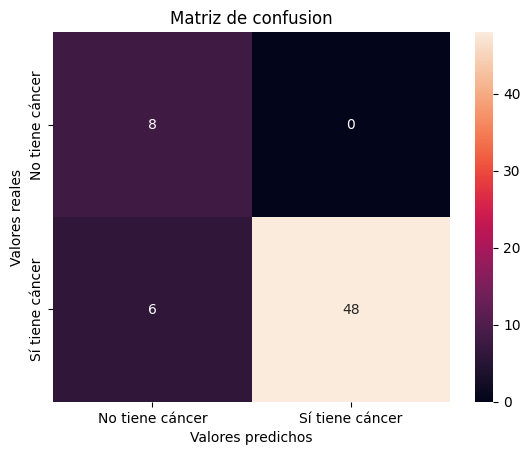

In [161]:
y_prediccion = arbol_cv.predict(x_test)
matriz_confusion(y_test, y_prediccion)

## K vecinos más cercanos (K nearest neighbors)

In [162]:
parametros = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [163]:
knn_cv = GridSearchCV(KNN, parametros, cv=10)

knn_cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [164]:
print("Mejores parámetros:",knn_cv.best_params_)
print("Precisión:",knn_cv.best_score_)
scores.append(knn_cv.best_score_)

Mejores parámetros: {'algorithm': 'auto', 'n_neighbors': 6, 'p': 1}
Precisión: 0.9151666666666666


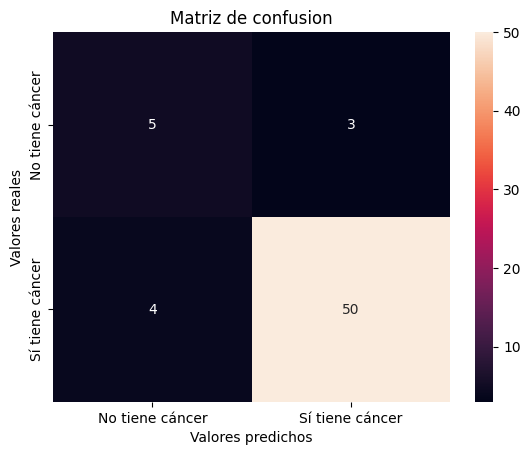

In [165]:
y_prediccion = knn_cv.predict(x_test)

matriz_confusion(y_test, y_prediccion)

In [166]:
datos = {'Modelo':['Regresión Logística', 'Máquias de Soporte Vectorial (SVM)', 'Árbol de Decisiones', 'K Nearest Neighbors (KNN)'],
         'Precisión':scores}

modelos_df = pd.DataFrame(datos)
modelos_df

,Modelo,Precisión
0,Regresión Logística,0.927000
1,Máquias de Soporte Vectorial (SVM),0.939167
2,Árbol de Decisiones,0.919167
3,K Nearest Neighbors (KNN),0.915167


<BarContainer object of 4 artists>

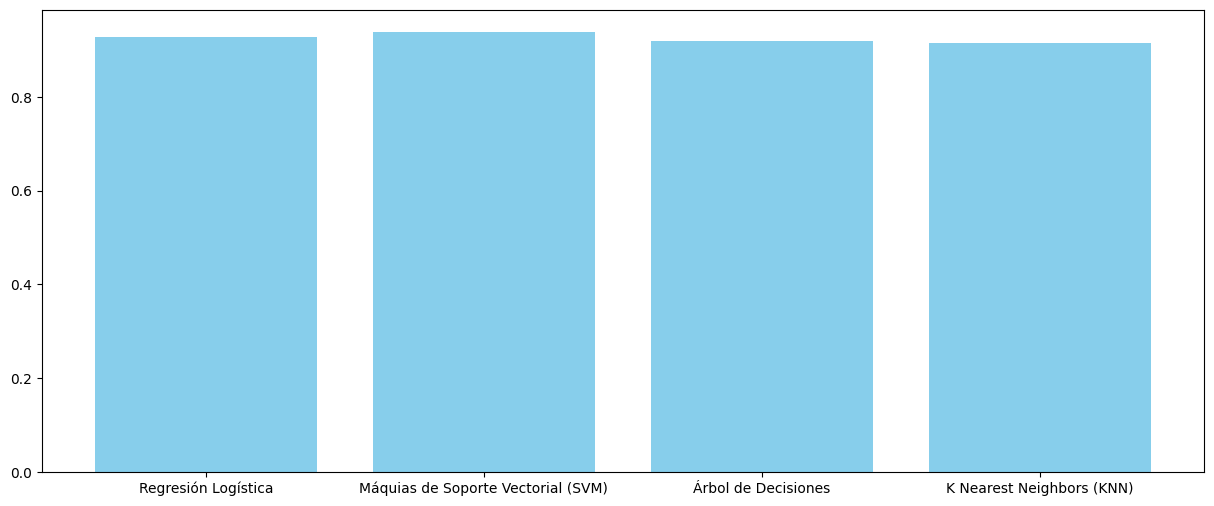

In [167]:
plt.figure(figsize=(15,6))
plt.bar(modelos_df['Modelo'], modelos_df['Precisión'], color='skyblue')

## Concluimos que los dos mejores algoritmos de clasificación, para este caso en concreto, son:
## 1. Regresión Logística
## 2. Máquinas de soporte vectorial